##  Finding Outliers


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
##Genearrte a dataset

# Set a seed for reproducibility
np.random.seed(42)

# Generate a dataset of 95 normal values
normal_data = np.random.normal(loc=50, scale=10, size=95)

# Introduce 5 outliers
outliers = np.random.uniform(low=5, high=95, size=5)

# Combine normal data and outliers
dataset_with_outliers = np.concatenate([normal_data, outliers])

# Shuffle the dataset
dataset =  np.random.shuffle(dataset_with_outliers)

# Print the dataset
print(dataset_with_outliers)


None


In [8]:
# z_score computation

outliers = []

def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            
    return outliers;


In [9]:
detect_outliers(dataset_with_outliers)

[5.6256917478071635, 82.46575249307091]

## IQR Computation

In [12]:
dataset = sorted(dataset_with_outliers)
dataset

[5.6256917478071635,
 23.802548959102555,
 30.124310853991073,
 30.403298761202244,
 30.86719755342202,
 32.36959844637266,
 32.75082167486967,
 35.214780096325725,
 35.75251813786544,
 35.87696298664709,
 36.71813951101569,
 37.791563500289776,
 38.037933759193294,
 38.490064225776976,
 38.93665025993972,
 39.422890710440996,
 39.87168879665576,
 40.91975924478789,
 41.607824767773614,
 41.91506397106812,
 42.56699028339011,
 42.801557916052914,
 42.979469061226474,
 43.23077999694041,
 43.54880245394876,
 43.98293387770603,
 43.99361310081195,
 44.37712470759027,
 44.556172754748175,
 44.70239796232961,
 44.81729781726352,
 44.982429564154636,
 45.2082576215471,
 45.30525614065048,
 45.34270246429743,
 45.365823071875376,
 45.393612290402125,
 46.078918468678424,
 46.149177195836835,
 46.723378534022316,
 46.907876241487855,
 46.98896304410711,
 47.009926495341325,
 47.083062502067236,
 47.658466252766644,
 47.6586304305082,
 47.74223699513465,
 47.80328112162488,
 48.14341023336183,

In [13]:
q1, q3 = np.percentile(dataset,[25,75])


In [14]:
print(q1,q3)

43.874401021766715 55.20590585731508


In [15]:
iqr = q3 - q1

In [16]:
print(iqr)

11.331504835548365


In [17]:
## Find the lower and upper fence
lower_fence = q1 - (1.5 * iqr)
higher_fence = q3 + (11.5 * iqr)

In [18]:
print(lower_fence, higher_fence)

26.877143768444167 185.5182114661213


In [19]:
import seaborn as sns

<Axes: >

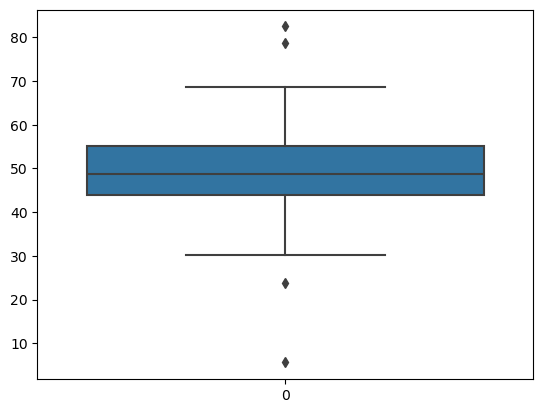

In [21]:
sns.boxplot(dataset)